<a href="https://colab.research.google.com/github/andreiamferreira/image-processing-course/blob/filtragem-espacial/Filtragem_Espacial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from google.colab import drive
drive.mount('/content/gdrive')

import cv2
import numpy as np
from matplotlib import pyplot as plt

#Implementação da figura 3.30 de Gonzlez, pg98.
img = np.zeros((5,5))
mask = np.array([(1, 2, 3), (4, 5, 6), (7, 8 ,9)]) # kernel que será aplicado em img
img[(2,2)] = 1

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [28]:
print(img)
print(mask)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


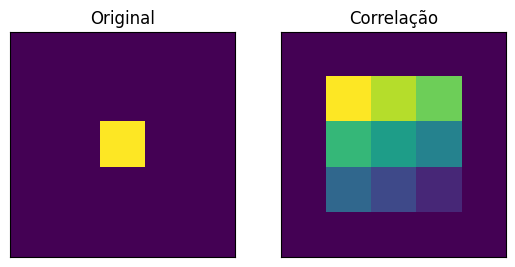

In [29]:
kernel = mask

img=np.array(img)
dst = cv2.filter2D(img,-1,kernel) # -1 é o "ddepth", DataType de cada elemento da imagem, ou seja, a exatidão para representar
#cadacada pixel. Quanto mais bits por pixel, melhor o contraste na imagem.
# metodo cv2.filter2D calcula a CORRELAÇÃO! ver pg. 98 gonzalez

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Correlação')
plt.xticks([]), plt.yticks([])
plt.show()

In [26]:
print(img)
print(dst)

[[[246 246 246]
  [  0   0   0]
  [249 249 249]
  ...
  [248 248 248]
  [248 248 248]
  [248 248 248]]

 [[247 247 247]
  [249 249 249]
  [250 250 250]
  ...
  [245 245 245]
  [245 245 245]
  [245 245 245]]

 [[  0   0   0]
  [250 250 250]
  [251 251 251]
  ...
  [243 243 243]
  [243 243 243]
  [255 255 255]]

 ...

 [[233 233 233]
  [233 233 233]
  [232 232 232]
  ...
  [156 156 156]
  [150 150 150]
  [165 165 165]]

 [[255 255 255]
  [233 233 233]
  [232 232 232]
  ...
  [157 157 157]
  [149 149 149]
  [165 165 165]]

 [[233 233 233]
  [233 233 233]
  [232 232 232]
  ...
  [161 161 161]
  [150 150 150]
  [162 162 162]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..

In [17]:
img.dtype

dtype('float64')

In [18]:
dst.dtype

dtype('float64')

**Filtro de suavização: média simples**

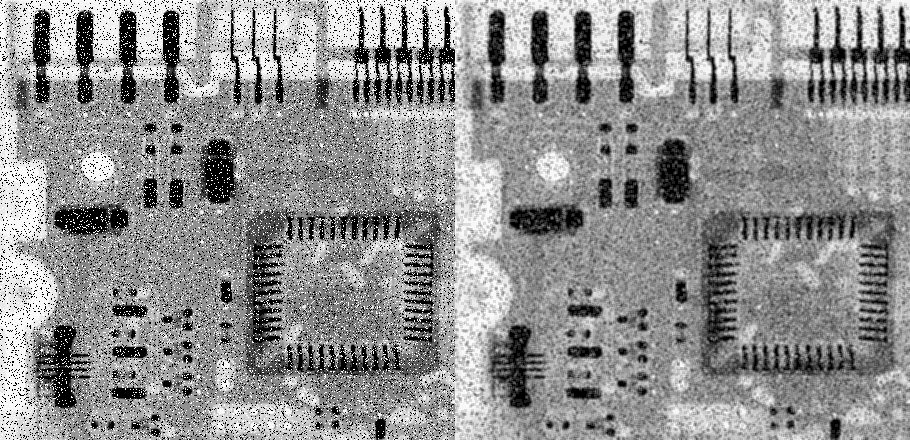

In [43]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/gdrive/MyDrive/Intro. Processamento de Imagens Digitais/Filtragem espacial/Fig0335.tif')
img_ = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #converte P&B

#kernel = np.array([[0.0, -1.0, 0.0],
                  #[-1.0, 4.0, -1.0],
                 # [0.0, -1.0, 0.0]])

#kernel = (1/9)*np.array([[1.0, 1.0, 1.0],
                 # [1.0, 1.0, 1.0],
                 # [1.0, 1.0, 1.0]])

#Criando filtros de média simples com difrentes vizinhanças:
size_kernel = 3
kernel = (1/(size_kernel*size_kernel))*np.ones((size_kernel,size_kernel))

#filter the source image
img_f = cv2.filter2D(img_,-1,kernel)

h_img = cv2.hconcat([img_, img_f])
cv2_imshow(h_img)


In [44]:
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

**Filtro de suavização: Mediana**

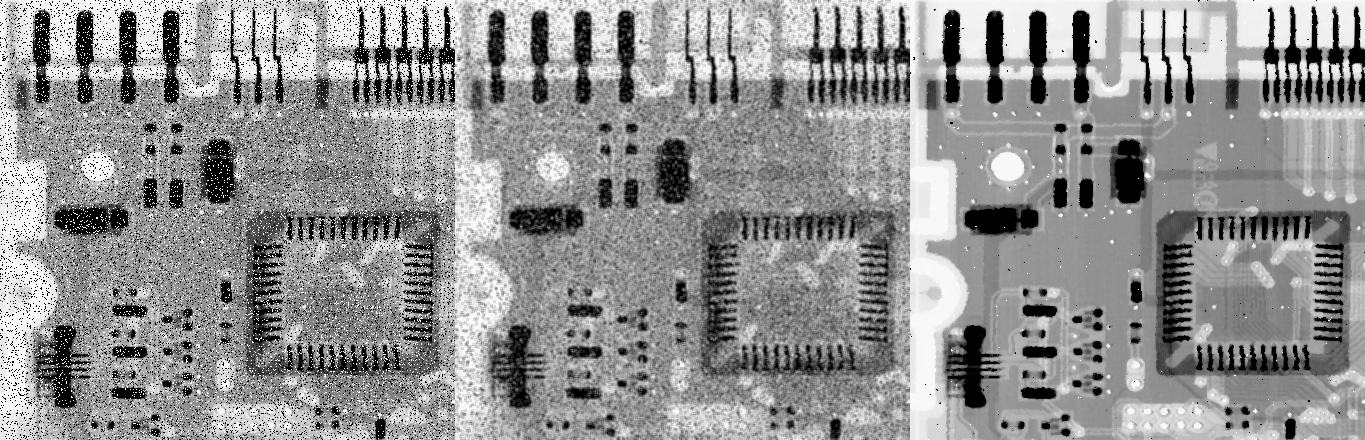

In [21]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/gdrive/MyDrive/Intro. Processamento de Imagens Digitais/Filtragem espacial/Fig0335.tif')
img_ = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #converte P&B

#Imagem 3.35 capítulo 3 livro do González
median = cv2.medianBlur(img_, 3)
h_img = cv2.hconcat([img_, img_f, median])
cv2_imshow(h_img)

**Filtros passa-altas:**

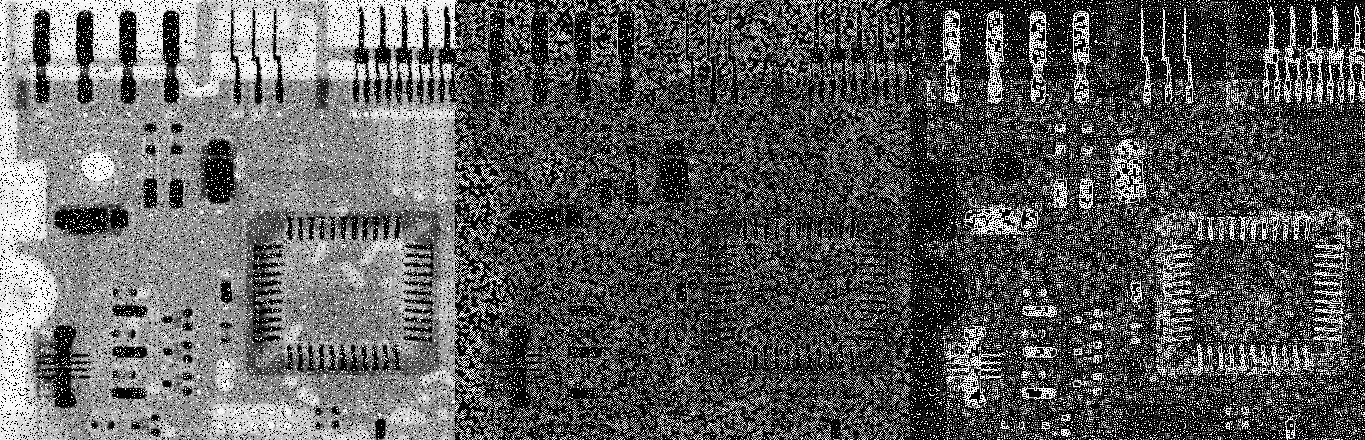

In [22]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/gdrive/MyDrive/Intro. Processamento de Imagens Digitais/Filtragem espacial/Fig0335.tif')
img_ = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #converte P&B

kernel1 = np.array([[0.0, -1.0, 0.0],
                  [-1.0, 4.0, -1.0],
                  [0.0, -1.0, 0.0]])

kernel2 = np.array([[1.0, 1.0, 1.0],
                  [1.0, -8.0, 1.0],
                  [1.0, 1.0, 1.0]])

#filter the source image
img_pa1 = cv2.filter2D(img_,-1,kernel1)
img_pa2 = cv2.filter2D(img_,-1,kernel2)

h_img = cv2.hconcat([img_, img_pa1, img_pa2])
cv2_imshow(h_img)



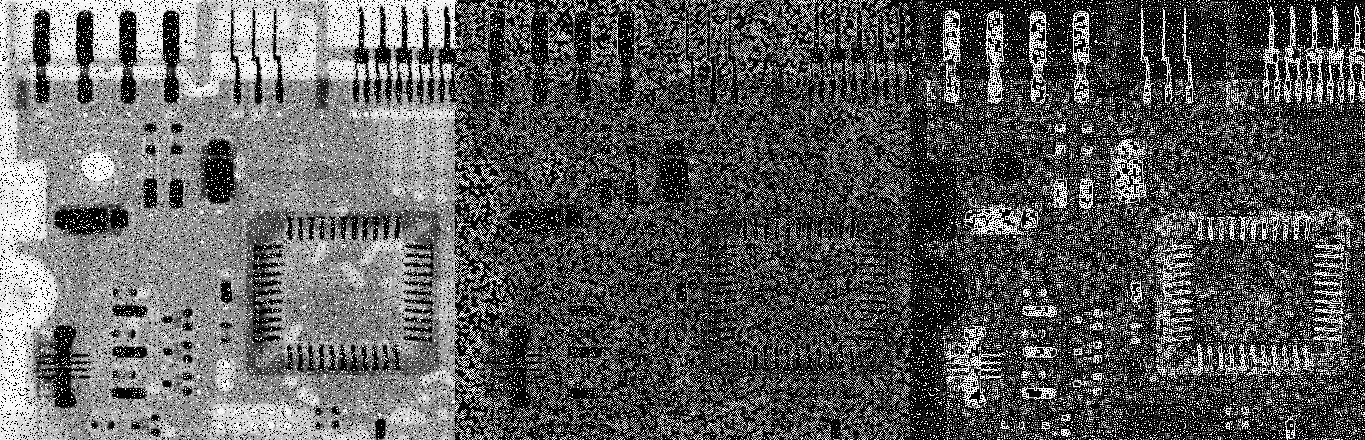

In [23]:
img = cv2.imread('/content/gdrive/MyDrive/Intro. Processamento de Imagens Digitais/Filtragem espacial/Fig0335.tif')
img_ = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #converte P&B

kernel1 = np.array([[0.0, -1.0, 0.0],
                  [-1.0, 4.0, -1.0],
                  [0.0, -1.0, 0.0]])

kernel2 = np.array([[1.0, 1.0, 1.0],
                  [1.0, -8.0, 1.0],
                  [1.0, 1.0, 1.0]])

#filter the source image
img_pa1 = cv2.filter2D(img_,-1,kernel1)
img_pa2 = cv2.filter2D(img_,-1,kernel2)

h_img = cv2.hconcat([img_, img_pa1, img_pa2])
cv2_imshow(h_img)


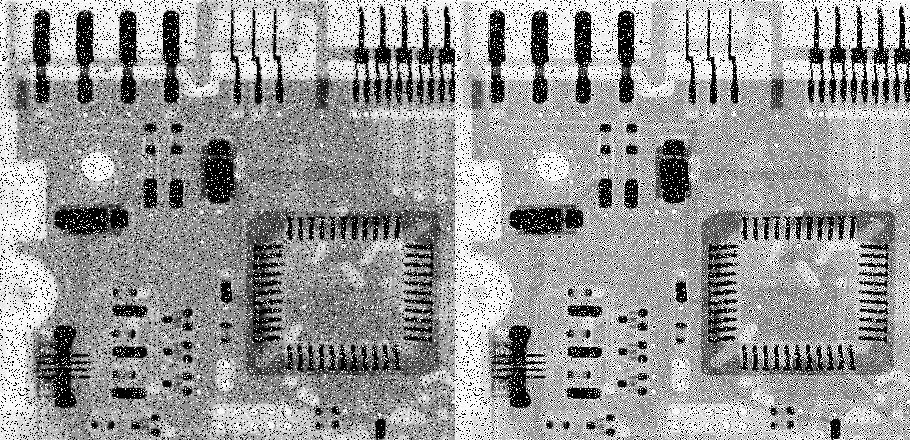

In [24]:
#AGUÇAMENTO:

agucamento=cv2.add(img_,img_pa1) #https://docs.opencv.org/3.4/d0/d86/tutorial_py_image_arithmetics.html

h_img = cv2.hconcat([img_, agucamento])
cv2_imshow(h_img)
